In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Importing the dataset
movies_clean_df = pd.read_csv('movies_clean.csv', delimiter = ',', quotechar='"')
movies_clean_df.head()

,title,release_date,genres,overview,first_genre,overview_stem,overview_lem
0,Toy Story,1995-10-30,Animation|Comedy|Family,"Led by Woody, Andy's toys live happily in his ...",Animation,led woodi andi toy live happili room andi birt...,Led Woody Andy toy live happily room Andy birt...
1,Jumanji,1995-12-15,Adventure|Fantasy|Family,When siblings Judy and Peter discover an encha...,Adventure,when sibl judi peter discov enchant board game...,When sibling Judy Peter discover enchant board...
2,Waiting to Exhale,1995-12-22,Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...",Comedy,cheat mistreat step women hold breath wait elu...,Cheated mistreat step woman hold breath wait e...
3,Father of the Bride Part II,1995-02-10,Comedy,Just when George Banks has recovered from his ...,Comedy,just georg bank recov daughter wed receiv news...,Just George Banks recover daughter wedding rec...
4,Heat,1995-12-15,Action|Crime|Drama|Thriller,"Obsessive master thief, Neil McCauley leads a ...",Action,obsess master thief neil mccauley lead top-not...,Obsessive master thief Neil McCauley lead top-...


In [4]:
def get_unique_genres(df: pd.DataFrame, column: str ='first_genre') -> list[str]:
  """Extract unique genres from a dataframe column

  Args:
      df (pd.DataFrame): Dataframe containing the genres
      column (str, optional): Column to extract the genres from. Defaults to 'first_genre'.

  Returns:
      list[str]: List of unique genres
  """
  genres = set()
  for line in df[column]:
    if column == 'genre':
      genres.update(line.split('|'))
    else:
      genres.add(line)
  return sorted(genres)

# Get class labels
classes = get_unique_genres(movies_clean_df)
print(classes)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller']


In [5]:
# Splitting dataframes into X and y
X_stem = movies_clean_df['overview_stem']
X_lem = movies_clean_df['overview_lem']
y = movies_clean_df['first_genre']

In [6]:
# Vectorizing the data
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_stem_tf = vectorizer.fit_transform(X_stem)
X_lem_tf = vectorizer.fit_transform(X_lem)

In [7]:
print("X_stem_tf ", X_stem_tf.shape)
print("X_lem_tf ", X_lem_tf.shape)

X_stem_tf  (10000, 254248)
X_lem_tf  (10000, 260847)


In [8]:
# Splitting dataframes into train and test
X_train_stem, X_test_stem, X_train_lem, X_test_lem, y_train, y_test = train_test_split(X_stem_tf, X_lem_tf, y, test_size=0.3, random_state=42)

print("X_train_stem shape:", X_train_stem.shape)
print("X_test_stem shape:", X_test_stem.shape)
print("X_train_lem shape:", X_train_lem.shape)
print("X_test_lem shape:", X_test_lem.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_stem shape: (7000, 254248)
X_test_stem shape: (3000, 254248)
X_train_lem shape: (7000, 260847)
X_test_lem shape: (3000, 260847)
y_train shape: (7000,)
y_test shape: (3000,)


In [9]:
def models_fit_predict(X_train, y_train, X_test) -> dict[str, np.ndarray]:
  """Fit and predict the models

  Args:
      X_train (np.ndarray): Training data
      y_train (np.ndarray): Training labels
      X_test (np.ndarray): Test data

  Returns:
      dict[str, np.ndarray]: Dictionary with the models results
  """
  
  # Create the model logistic regression
  print("LogisticRegression train started...")
  LR_model = LogisticRegression(max_iter=1000, n_jobs=6)
  LR_model.fit(X_train, y_train)
  print("LogisticRegression train ended...")
  
  # Create the model SVC
  print("SVC train started...")
  SVC_model = svm.SVC()
  SVC_model.fit(X_train, y_train)
  print("SVC train ended...")
  
  # Create the model NuSVC
  print("NuSVC train started...")
  NuSVC_model = svm.NuSVC()
  NuSVC_model.fit(X_train, y_train)
  print("NuSVC train ended...")
  
  # Create the model multi-layer perceptron
  # print("MLPClassifier train started...")
  # MLP_model = MLPClassifier(hidden_layer_sizes=(5, 5, 5), random_state=0, max_iter=100)
  # MLP_model.fit(X_train, y_train)
  # print("MLPClassifier train ended...")
  
  # Predicting the Test set results
  print("Predicting start...")
  y_pred_LR = LR_model.predict(X_test)
  y_pred_SVC = SVC_model.predict(X_test)
  y_pred_NuSVC = NuSVC_model.predict(X_test)
  # y_pred_MLP = MLP_model.predict(X_test)
  print("Predicting ended...")
  
  # Build the dictionary with the models results
  models = {
    'Logistic Regression': y_pred_LR,
    'SVC': y_pred_SVC,
    'NuSVC': y_pred_NuSVC,
    # 'MLP': y_pred_MLP
  }
  
  return models
  

In [10]:
def plot_confusion_matrix(y_test, y_pred, model_name: str, classes: list[str]) -> None:
  """Plot the confusion matrix

  Args:
      y_test (np.ndarray): Test labels
      y_pred (np.ndarray): Predicted labels
      model_name (str): Model name
      classes (list[str]): List of classes
  """
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='true')
  vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
  # Set the size of the figure
  fig, ax = plt.subplots(figsize=(14, 10))
  # Plot the normalized confusion matrix
  vis.plot(values_format=".2f", ax=ax)
  plt.title(model_name + ' Normalized Confusion Matrix')
  # Rotate x-axis labels
  plt.xticks(rotation=90)
  plt.show()

In [11]:
def plot_and_print_results(models, y_test, classes: list[str]) -> None:
  """Print the classification report and plot the confusion matrix

  Args:
      models (dict[str, np.ndarray]): Dictionary with the models results
      y_test (np.ndarray): Test labels
      classes (list[str]): List of classes
  """
  for model_name, y_pred in models.items():
    print(f"========================{model_name}========================")
    print(classification_report(y_test, y_pred, labels=classes))
    print("Global scores:")
    print("- Accuracy:\t", accuracy_score(y_test, y_pred))
    print("- Precision:\t", precision_score(y_test, y_pred, average='weighted'))
    print("- Recall:\t", recall_score(y_test, y_pred, average='weighted'))
    print("- F1 Score:\t", f1_score(y_test, y_pred, average='weighted'))
    print("\n")
    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name, classes)

In [12]:
# Fit and predict the models for the stemmed data
models_stem = models_fit_predict(X_train_stem, y_train, X_test_stem)

LogisticRegression train started...


LogisticRegression train ended...
SVC train started...
SVC train ended...
NuSVC train started...
NuSVC train ended...
Predicting start...
Predicting ended...


========================Logistic Regression========================
              precision    recall  f1-score   support

      Action       0.40      0.30      0.34       314
   Adventure       0.41      0.55      0.47       281
   Animation       0.62      0.56      0.59       291
      Comedy       0.37      0.38      0.37       298
       Crime       0.35      0.44      0.39       281
 Documentary       0.73      0.82      0.77       315
       Drama       0.35      0.20      0.25       324
      Horror       0.49      0.58      0.53       302
     Romance       0.41      0.46      0.43       311
    Thriller       0.30      0.25      0.27       283

    accuracy                           0.45      3000
   macro avg       0.44      0.45      0.44      3000
weighted avg       0.45      0.45      0.44      3000

Global scores:
- Accuracy:	 0.45166666666666666
- Precision:	 0.4452659102588514
- Recall:	 0.45166666666666666
- F1 Score:	 0.4426701378715527




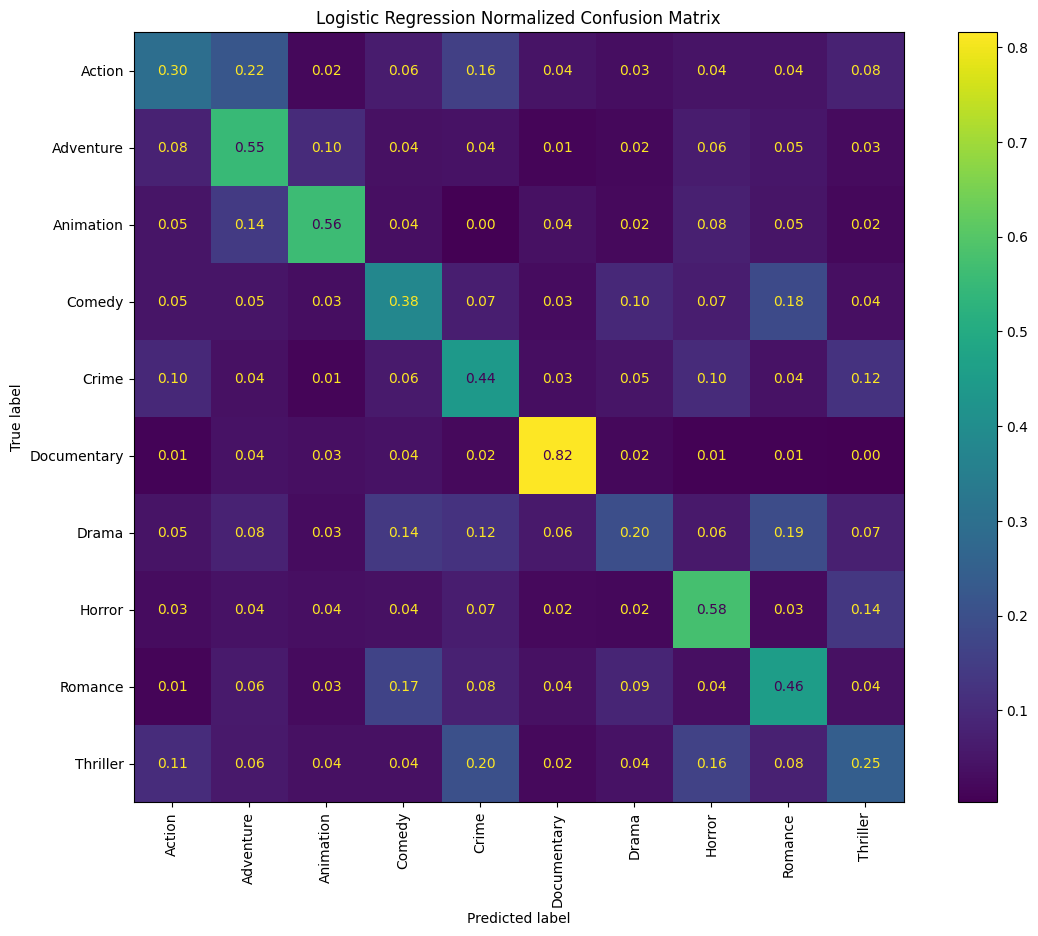

========================SVC========================
              precision    recall  f1-score   support

      Action       0.47      0.23      0.31       314
   Adventure       0.34      0.63      0.44       281
   Animation       0.72      0.45      0.56       291
      Comedy       0.30      0.54      0.39       298
       Crime       0.35      0.43      0.38       281
 Documentary       0.82      0.69      0.75       315
       Drama       0.34      0.14      0.20       324
      Horror       0.57      0.42      0.48       302
     Romance       0.46      0.39      0.42       311
    Thriller       0.26      0.35      0.30       283

    accuracy                           0.42      3000
   macro avg       0.46      0.43      0.42      3000
weighted avg       0.46      0.42      0.42      3000

Global scores:
- Accuracy:	 0.423
- Precision:	 0.46498685001558615
- Recall:	 0.423
- F1 Score:	 0.42205374732589107




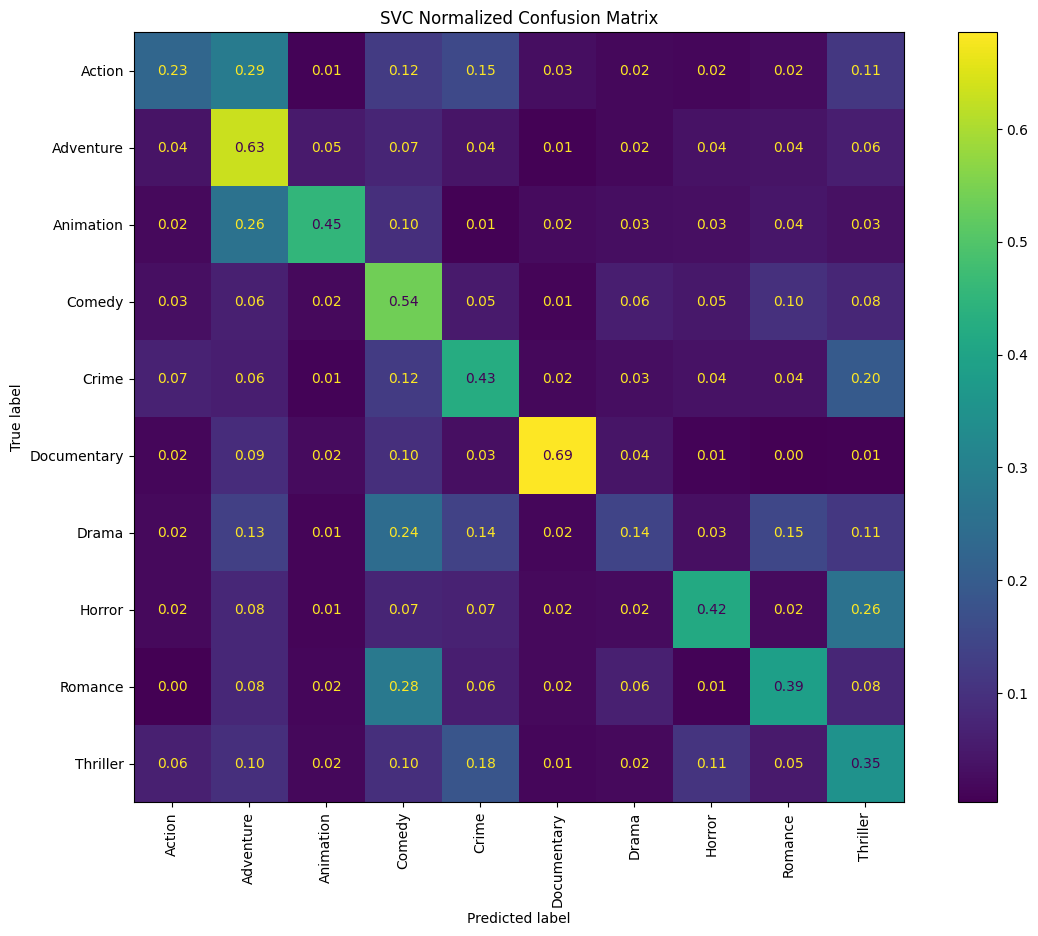

========================NuSVC========================
              precision    recall  f1-score   support

      Action       0.40      0.30      0.34       314
   Adventure       0.38      0.56      0.45       281
   Animation       0.67      0.53      0.59       291
      Comedy       0.35      0.44      0.39       298
       Crime       0.36      0.43      0.39       281
 Documentary       0.82      0.72      0.77       315
       Drama       0.32      0.23      0.27       324
      Horror       0.55      0.50      0.52       302
     Romance       0.44      0.44      0.44       311
    Thriller       0.30      0.33      0.31       283

    accuracy                           0.45      3000
   macro avg       0.46      0.45      0.45      3000
weighted avg       0.46      0.45      0.45      3000

Global scores:
- Accuracy:	 0.44666666666666666
- Precision:	 0.4596538674341067
- Recall:	 0.44666666666666666
- F1 Score:	 0.44828384527708875




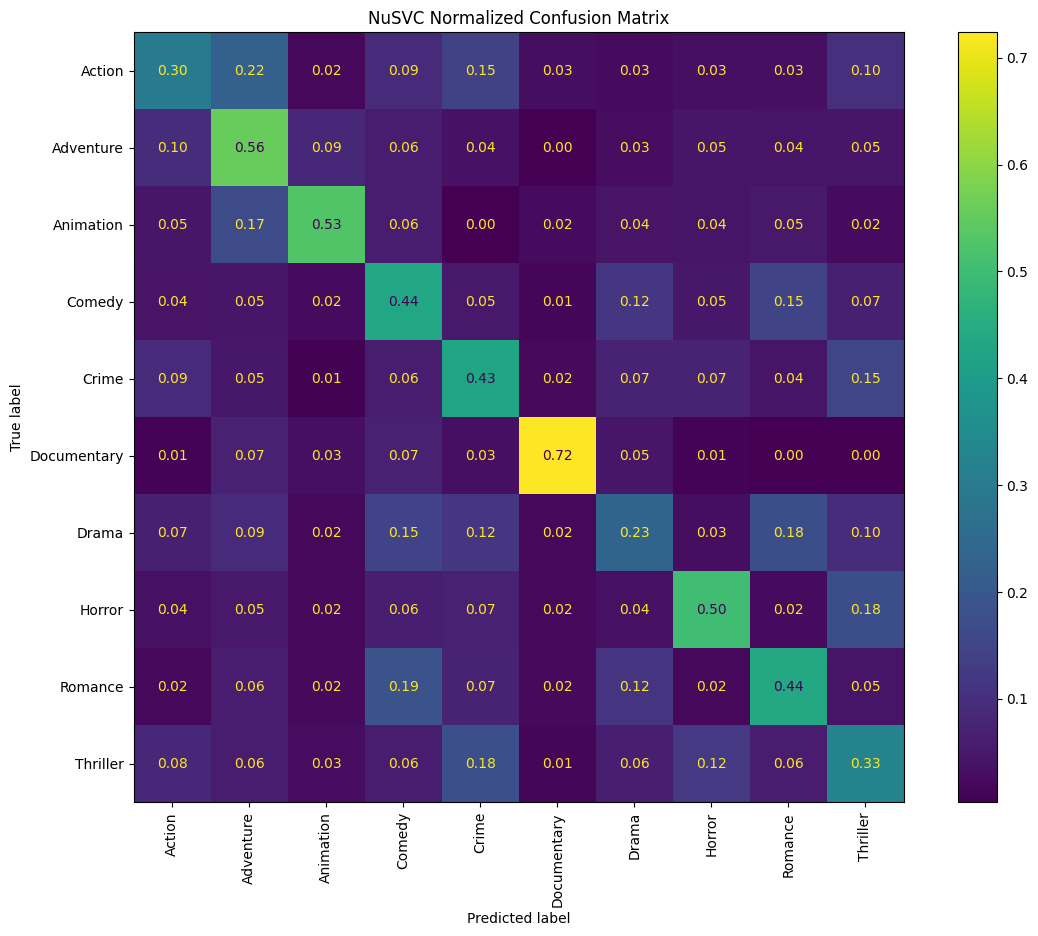

In [13]:
# Print the results
plot_and_print_results(models_stem, y_test, classes)

In [14]:
# Fit and predict the models for the lemmatized data
models_lem = models_fit_predict(X_train_lem, y_train, X_test_lem)

LogisticRegression train started...
LogisticRegression train ended...
SVC train started...
SVC train ended...
NuSVC train started...
NuSVC train ended...
Predicting start...
Predicting ended...


========================Logistic Regression========================
              precision    recall  f1-score   support

      Action       0.41      0.30      0.34       314
   Adventure       0.39      0.51      0.44       281
   Animation       0.53      0.55      0.54       291
      Comedy       0.35      0.35      0.35       298
       Crime       0.36      0.47      0.41       281
 Documentary       0.70      0.78      0.74       315
       Drama       0.34      0.20      0.25       324
      Horror       0.48      0.54      0.51       302
     Romance       0.42      0.46      0.44       311
    Thriller       0.31      0.24      0.27       283

    accuracy                           0.44      3000
   macro avg       0.43      0.44      0.43      3000
weighted avg       0.43      0.44      0.43      3000

Global scores:
- Accuracy:	 0.43966666666666665
- Precision:	 0.4315378855195052
- Recall:	 0.43966666666666665
- F1 Score:	 0.4301854125854952




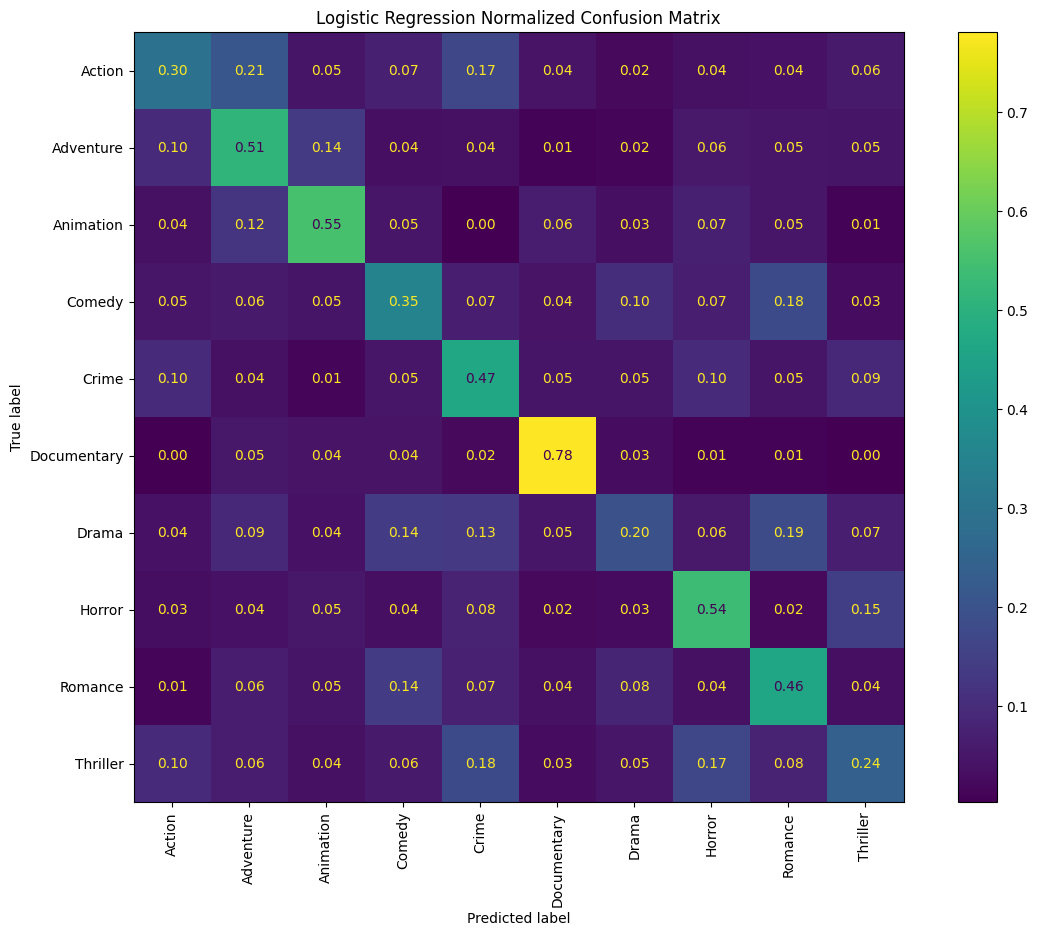

========================SVC========================
              precision    recall  f1-score   support

      Action       0.49      0.19      0.28       314
   Adventure       0.32      0.64      0.43       281
   Animation       0.63      0.47      0.54       291
      Comedy       0.32      0.54      0.40       298
       Crime       0.36      0.47      0.41       281
 Documentary       0.83      0.69      0.75       315
       Drama       0.41      0.15      0.22       324
      Horror       0.56      0.41      0.47       302
     Romance       0.46      0.37      0.41       311
    Thriller       0.24      0.32      0.28       283

    accuracy                           0.42      3000
   macro avg       0.46      0.43      0.42      3000
weighted avg       0.47      0.42      0.42      3000

Global scores:
- Accuracy:	 0.4226666666666667
- Precision:	 0.46707305675594385
- Recall:	 0.4226666666666667
- F1 Score:	 0.41940644349724493




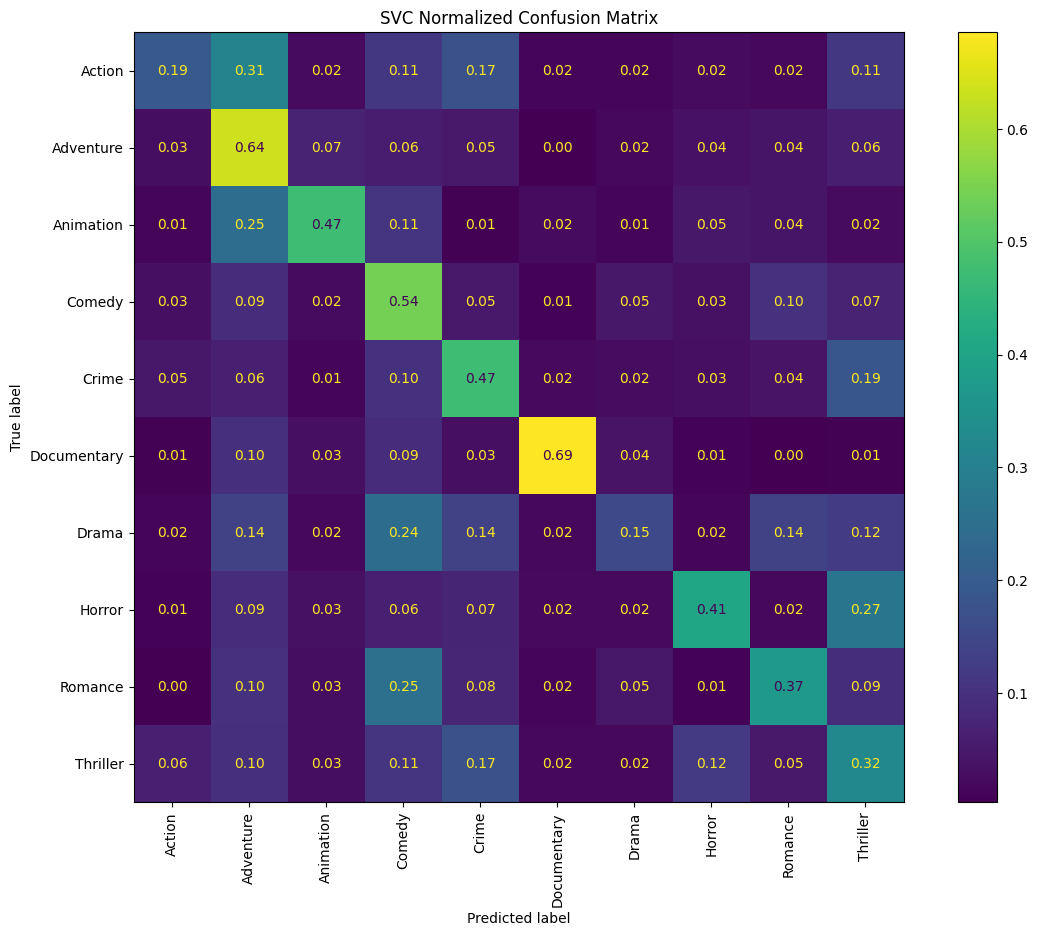

========================NuSVC========================
              precision    recall  f1-score   support

      Action       0.42      0.31      0.35       314
   Adventure       0.37      0.54      0.44       281
   Animation       0.60      0.52      0.56       291
      Comedy       0.34      0.42      0.38       298
       Crime       0.37      0.45      0.40       281
 Documentary       0.82      0.72      0.77       315
       Drama       0.33      0.25      0.28       324
      Horror       0.53      0.48      0.51       302
     Romance       0.42      0.42      0.42       311
    Thriller       0.28      0.29      0.28       283

    accuracy                           0.44      3000
   macro avg       0.45      0.44      0.44      3000
weighted avg       0.45      0.44      0.44      3000

Global scores:
- Accuracy:	 0.43866666666666665
- Precision:	 0.4493311293213395
- Recall:	 0.43866666666666665
- F1 Score:	 0.439634669542987




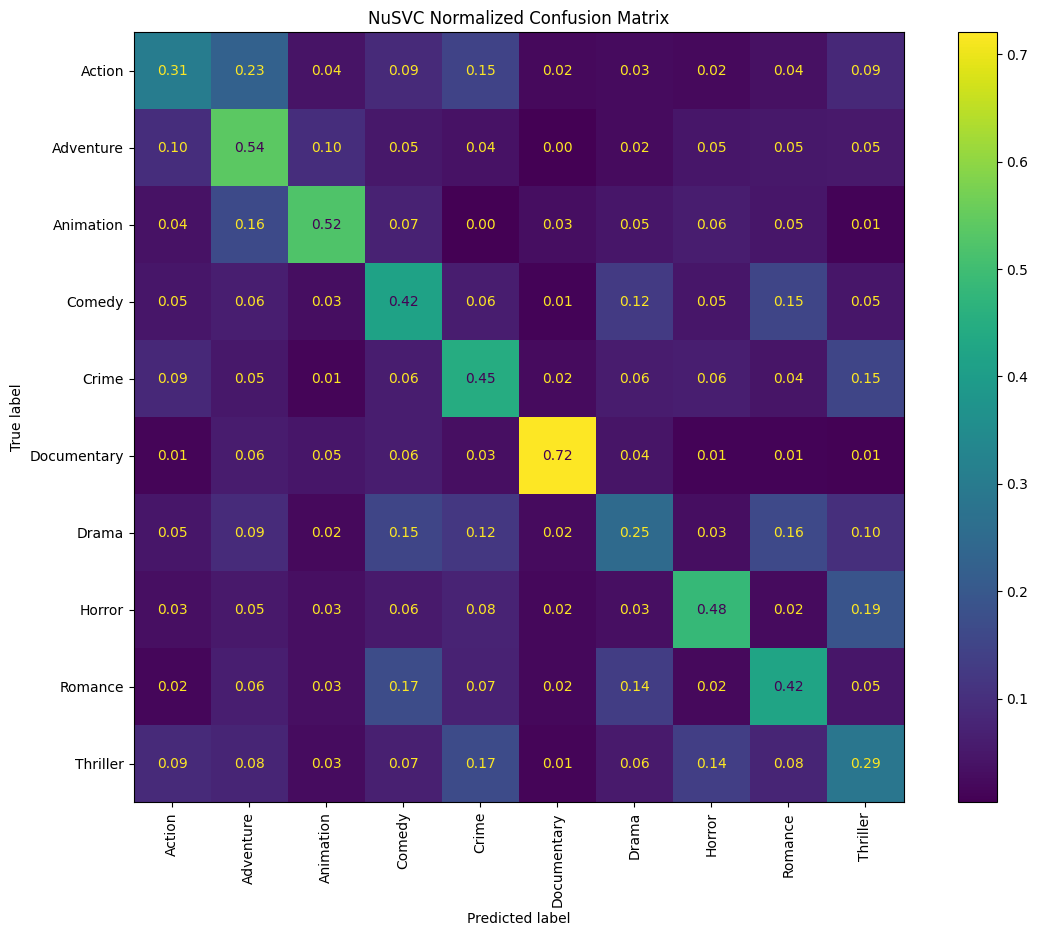

In [15]:
# Print the results
plot_and_print_results(models_lem, y_test, classes)